<a href="https://colab.research.google.com/github/MarKosVi/ColabProjects/blob/master/Processamento_de_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' 

Detecção de faces é a capacidade de detectar rostos em uma imagem. Para isso técnicas de visão computacional
buscam em uma imagem características que generalizem de maneira geral a forma de um  rosto. Uma vez que uma face 
é detectada em uma imagem o  processo de reconhecimento pode ser iniciado. 


'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


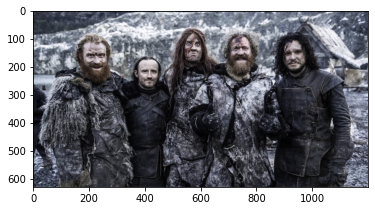

In [ ]:
#########Leitura de Imagens##########
%matplotlib inline  
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os



# Leitura da Imagem
img = cv2.imread('/content/drive/My Drive/facesDetect/serie.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
###############Deteccao de Faces##############
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (224, 224)

img = cv2.imread('/content/drive/My Drive/facesDetect/serie.jpg')

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/facesDetect/haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
)

cont = 0
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cont=cont + 1

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
########################################Exercicio########################################
# 1 - Teste estes algoritmos com outras imagens que estao presentes no diretorio imagem - OK.
# 2 - Crie um algoritmo que extraia e salve todas as faces presentes em cada imagem - OK.
# 3 - Modifique este algoritmo para capturar 10 faces presentes em um video.

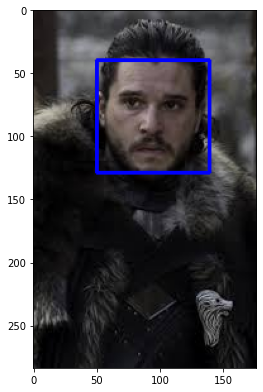

In [ ]:
plt.rcParams['figure.figsize'] = (4, 10)
img = cv2.imread('/content/drive/My Drive/facesDetect/johnSnow.jpg')
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/facesDetect/haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
)

cont = 0
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cont=cont + 1
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

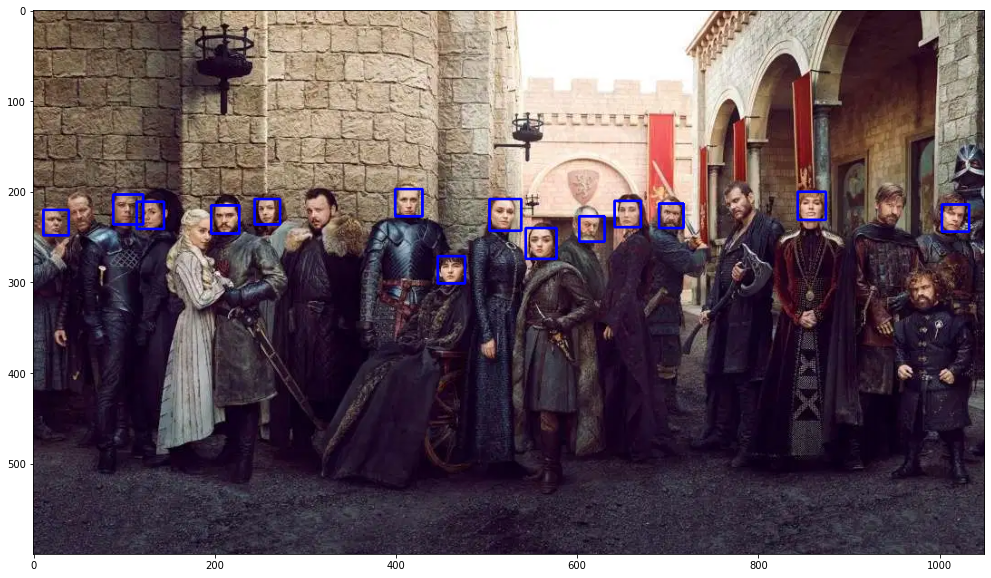

14  rostos encontrados


In [ ]:
plt.rcParams['figure.figsize'] = (24, 10)
img = cv2.imread('/content/drive/My Drive/facesDetect/GOT-S8.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(5, 5),
)

cont = 0
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cont=cont + 1

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print(cont, ' rostos encontrados')

pasta já criada


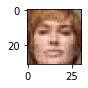

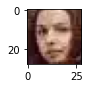

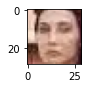

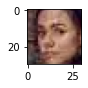

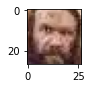

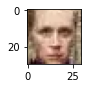

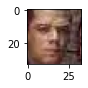

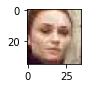

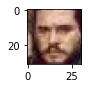

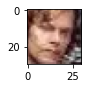

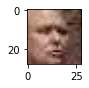

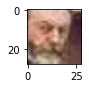

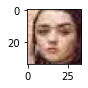

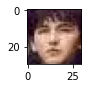

In [ ]:
from google.colab import files
plt.rcParams['figure.figsize'] = (24, 10)
imagem = cv2.imread("/content/drive/My Drive/facesDetect/GOT-S8.webp")
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(5, 5),
)

#Criar pasta para os rostos capturados
path = '/content/drive/My Drive/facesDetect/FacesCapturadas'

if not os.path.exists(path):
        os.makedirs(path)
        print('pasta criada')
else:
  print('pasta já criada')

def SalvarRostos(imagem, path):
  #Recortar rostos
  plt.rcParams['figure.figsize'] = (1, 1)
  os.chdir(path)
  count = 0
  format ="jpg"
  #Salvar e mostrar rostos
  for (x,y,w,h) in faces:
      name = str(count)
      filename = name+'.'+format
      recorte = imagem[y:y+h, x:x+w] 
      cv2.imwrite(filename, recorte) 
      count=count + 1
      plt.imshow(cv2.cvtColor(recorte, cv2.COLOR_BGR2RGB))
      plt.show() 

SalvarRostos(imagem, path)
    

pasta já criada


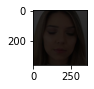

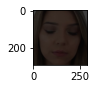

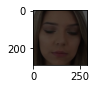

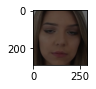

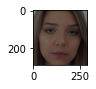

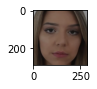

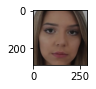

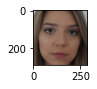

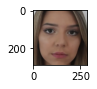

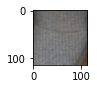

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
plt.rcParams['figure.figsize'] = (244, 244)

path = '/content/drive/My Drive/facesDetect/FacesVideo'
cap = cv2.VideoCapture("/content/drive/My Drive/facesDetect/teste.mp4")

if not os.path.exists(path):
        os.makedirs(path)
        print('pasta criada')
else:
  print('pasta já criada')

count = 0
while(count < 10):
  ret, frame=cap.read()
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(5, 5)
  )
  #Recortar rostos
  plt.rcParams['figure.figsize'] = (1, 1)
  os.chdir(path)
  format ="jpeg"
  for (x,y,w,h) in faces:
    name = str(count)
    filename = name+'.'+format
    recorte = frame[y:y+h, x:x+w] 
    cv2.imwrite(filename, recorte) 
    count=count + 1
    plt.imshow(cv2.cvtColor(recorte, cv2.COLOR_BGR2RGB))
    plt.show() 


